# Question 1

In [20]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
def construct_path(meeting_point, parent_fwd, parent_bwd):
    path_forward = []
    cur = meeting_point
    while cur is not None:
        path_forward.append(cur)
        cur = parent_fwd[cur]
    path_forward.reverse()

    path_backward = []
    cur = parent_bwd[meeting_point]
    while cur is not None:
        path_backward.append(cur)
        cur = parent_bwd[cur]

    # print(f"Forward Path: {path_forward}\nBackward Path: {path_backward}")
    return path_forward + path_backward

In [22]:
def visualize_graph_and_path(graph, path=None):
    G = nx.Graph() # empty graph
    for node, edges in graph.items(): # iterate over the nodes and edges
        for neighbor, weight in edges: # get nodes and weights
            G.add_weighted_edges_from([(node, neighbor, weight)]) # add weighted edges to graph
    pos = nx.spring_layout(G) # calculate position
    nx.draw(G, pos, with_labels=True, node_size=500, font_size=9) # draw nodes
    nx.draw_networkx_edge_labels( # edge labels 'weights' are added
        G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    )
    if path: #if a path is provided, highight it
        edges_in_path = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='r', width=2)
    plt.show()

In [23]:

def bidirectional_bfs(graph, start, goal):
    if start == goal:
        print(f"Visited order from start: [{start}]")
        print(f"Visited order from goal: [{goal}]")
        print(f"Shortest path: [{start}]")
        return

    visited_fwd = set([start])
    visited_bwd = set([goal])
    parent_fwd = {start: None}
    parent_bwd = {goal: None}

    queue_fwd = deque([start])
    queue_bwd = deque([goal])

    visited_order_fwd = []
    visited_order_bwd = []
    
    while queue_fwd and queue_bwd:
        if queue_fwd:
            node = queue_fwd.popleft()
            visited_order_fwd.append(node)
            for adjnode, _ in graph.get(node, []):
                if adjnode not in visited_fwd:
                    visited_fwd.add(adjnode)
                    parent_fwd[adjnode] = node
                    queue_fwd.append(adjnode)
                    if adjnode in visited_bwd:
                        # found in both directions
                        print(f"Visited order from start: {visited_order_fwd}")
                        print(f"Visited order from goal: {visited_order_bwd}")
                        print(f"Meeting point Node: ['{adjnode}']")
                        path = construct_path(adjnode, parent_fwd, parent_bwd)
                        print(f"Shortest path: {path}")
                        visualize_graph_and_path(graph, path)
                        return

        if queue_bwd:
            node = queue_bwd.popleft()
            visited_order_bwd.append(node)
            for adjnode, _ in graph.get(node, []):
                if adjnode not in visited_bwd:
                    visited_bwd.add(adjnode)
                    parent_bwd[adjnode] = node
                    queue_bwd.append(adjnode)
                    if adjnode in visited_fwd:
                        print(f"Visited order from start: {visited_order_fwd}")
                        print(f"Visited order from goal: {visited_order_bwd}")
                        print(f"Meeting point Node: ['{adjnode}']")
                        path = construct_path(adjnode, parent_fwd, parent_bwd)
                        print(f"Shortest path: {path}")
                        visualize_graph_and_path(graph, path)
                        return

    print(f"Visited order from start: {visited_order_fwd}")
    print(f"Visited order from goal: {visited_order_bwd}")
    print("No path found.")


Visited order from start: ['D', 'B']
Visited order from goal: ['F']
Meeting point Node: ['E']
Shortest path: ['D', 'B', 'E', 'F']


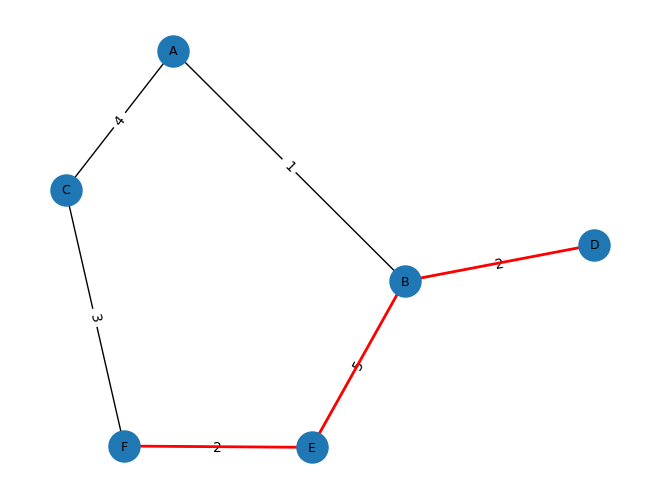

In [24]:
graph = {
    'A': [('B', 1), ('C', 2)], 
    'B': [('E', 5), ('D', 2), ('A', 1)], 
    'C': [('A', 4), ('F', 3)], 
    'D': [('B', 2)], 
    'E': [('F', 2), ('B', 5)],
    'F': [('E', 2), ('C', 3)]
}
start_node = 'D'
goal_node = 'F'
bidirectional_bfs(graph, start_node, goal_node)

# Question 2

## Problem Statement

### Parameters:

1. **Material Composition (M):** The percentatge of high strength fibres. 
    - Range: 0% to 100%
2. **Thickness (T):** Diameter of Rope in milimeters.
    - Range: 10mm to 50mm
3. **Length (L):** Length of Rope in meters.
    - Range: 10m to 100m
4. **Twist Factor (F):** Number of twists in the rope.
    - Range: 5 to 20 twists per meter

### Objective Function:

$Strength (S) = (M * 0.8) + (T * 1.5) + (L * 0.2) + (F*0.5)$

### Constraints:

- $M \geq 20$
- $T \leq 40$
- $L \geq 20$
- $F \geq 10$

In [25]:
import random

In [26]:
def fitness(individual):
    M, T, L, F = individual
    if M < 20 or T > 40 or L < 20 or F < 10:
        return 0
    fitness_value = M*0.8 + T*1.5 + L*0.2 + F*0.5
    return fitness_value

In [27]:
def create_population(size):
    population = []
    for _ in range(size):
        M = random.randint(0, 100)
        T = random.randint(10, 50)
        L = random.randint(10, 100)
        F = random.randint(5, 20)
        population.append((M, T, L, F))
    return population

In [28]:
def crossover(parent1, parent2):
    point = random.randint(1, 3)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

In [29]:
def mutate(individual, mutation_rate=0.1):
    M, T, L, F = individual
    if random.random() < mutation_rate:
        M = random.randint(0, 100)
        T = random.randint(10, 50)
        L = random.randint(10, 100)
        F = random.randint(5, 20)
    return (M, T, L, F)

In [30]:
Y = []
X = []
def genetic_algorithm(pop_size=20, generations=10):
    population = create_population(pop_size)
    for _ in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        best_fitness = fitness(population[0])
        Y.append(best_fitness)
        X.append(_)
        next_gen = population[:2]
        while len(next_gen) < pop_size:
            p1, p2 = random.choices(population[:10], k=2)
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)
            next_gen += [c1, c2]
        population = next_gen
    return max(population, key=fitness)

In [31]:
best_rope = genetic_algorithm(pop_size=10, generations=50)
print("Best rope configuration:", best_rope)
print(f"M: {best_rope[0]}, T: {best_rope[1]}, L: {best_rope[2]}, F: {best_rope[3]}")
print("Best rope fitness:", fitness(best_rope))

Best rope configuration: (90, 39, 99, 20)
M: 90, T: 39, L: 99, F: 20
Best rope fitness: 160.3


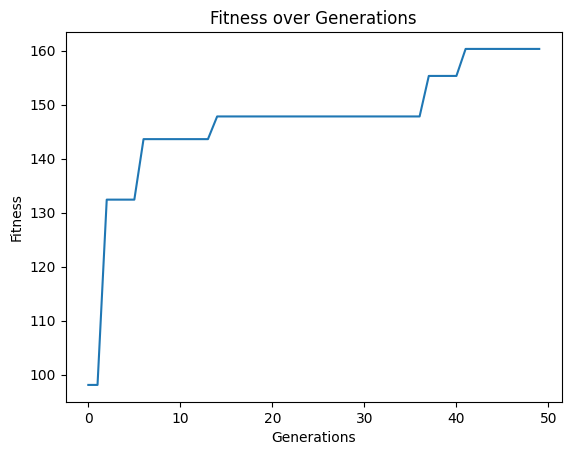

In [32]:
import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.show()